<a href="https://colab.research.google.com/github/DOleaga/CRIMEMachineLearning/blob/main/FINALAICrimeDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('../content/drive/MyDrive/crimedata.csv', encoding = 'unicode_escape', usecols=['Primary Type', 'Arrest', 'FBI Code', 'Location', 'Location Description'])
df.head()

,Primary Type,Location Description,Arrest,FBI Code,Location
0,BATTERY,STREET,False,04B,"(41.891398861, -87.744384567)"
1,OTHER OFFENSE,STREET,True,26,"(41.773371528, -87.665319468)"
2,BATTERY,APARTMENT,False,08B,"(41.81386068, -87.596642837)"
3,BATTERY,APARTMENT,False,08B,"(41.800802415, -87.622619343)"
4,ROBBERY,SIDEWALK,False,3,"(41.878064761, -87.743354013)"


In [ ]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()

In [ ]:
LABEL_ENCODING("Arrest")
LABEL_ENCODING("FBI Code")
LABEL_ENCODING("Location")
LABEL_ENCODING("Primary Type")
LABEL_ENCODING("Location Description")
df.head()

,Primary Type,Location Description,Arrest,FBI Code,Location
0,2,112,0,3,154514
1,24,112,1,20,68511
2,2,17,0,5,103583
3,2,17,0,5,94664
4,29,108,0,21,139803


Text(0.5, 1.0, 'Correlation between various factors and Arrest')

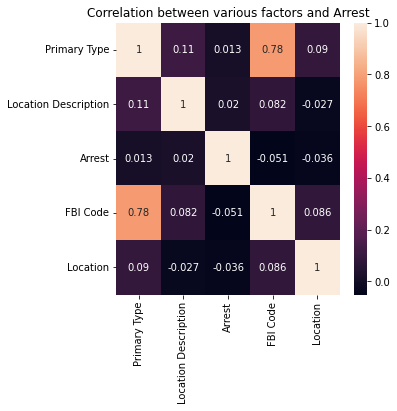

In [ ]:
correlation = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot=True);
plt.title('Correlation between various factors and Arrest')

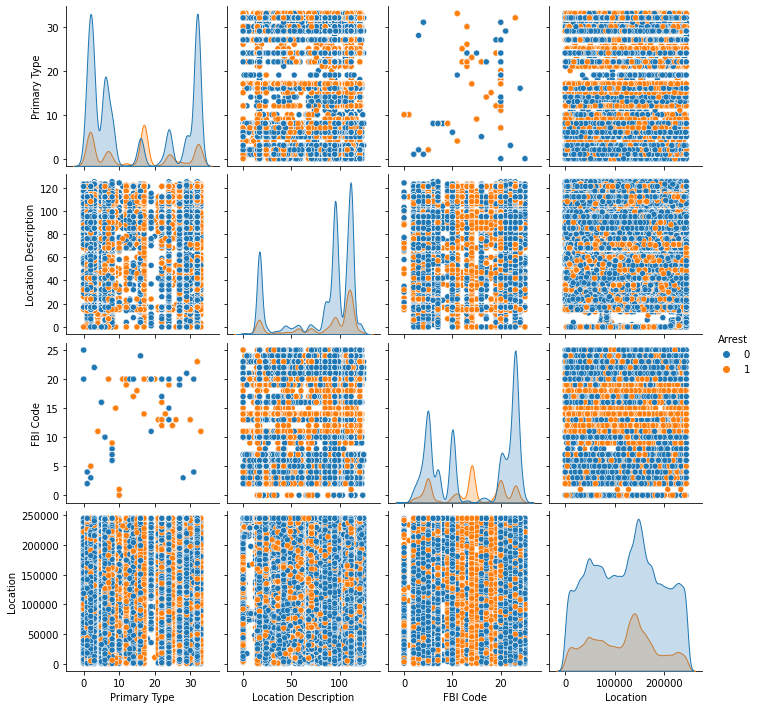

In [ ]:
sns.pairplot(df, hue="Arrest");

In [ ]:
X = df.drop(columns=['Arrest'])

In [ ]:
y = df['Arrest'].values

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 1, 0, 0])

In [ ]:
knn.score(X_test, y_test)

0.8212498802584943

In [ ]:
error_rate= []
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

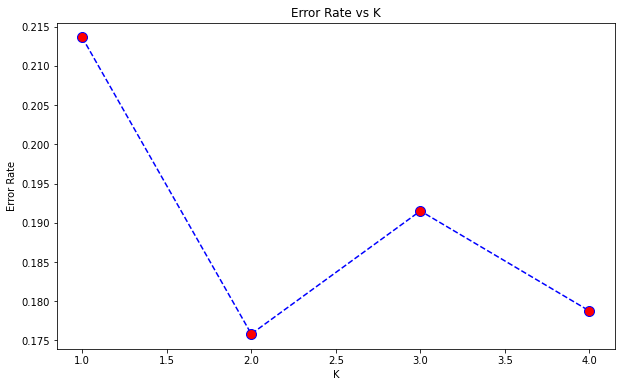

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,5),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
l,a = list(set(df.Location)),[]
for i in range(len(l)):
    a.append(list(df.Location).count(l[i]))
plt.barh(l,a,color='b')
plt.title('Location')
ax = plt.gca()
ax.set_facecolor('#fff')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
# Gaussian NB Classifier

gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_predict = gnb.predict(X_test)
accuracy_score(y_test, gnb_predict, normalize = True)
# sns.scatterplot(x = gnb_predict, y = y_test)









0.7815988622714779